In [1]:
import numpy as np
import pandas as pd
import random as rand
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [2]:
df1 = pd.read_csv('one_more.csv')

In [3]:
df1.shape

(37661705, 4)

In [4]:
#df = pd.DataFrame(columns=['','pgn','spn','decodedValue'])
df = df1.sample(frac=0.1, replace=False)

In [5]:
df.head(10)

,Unnamed: 0,pgn,spn,decodedValue
15327501,41235569,65266,51,90.0
18129761,48487390,61443,559,1.0
35930507,96488803,65247,515,5125.0
1904430,5859064,61443,5398,6.0
8765723,23595728,61444,4154,0.0
4037322,11335312,61443,2979,0.0
7780857,21039866,61443,92,98.0
672465,1736073,61441,577,0.0
27872541,73765378,61443,2979,0.0
37165348,100473341,61441,1439,0.0


In [6]:
df.sort_index(inplace=True)

In [7]:
'''
for i, rows in df1.iterrows:
    x = rand.random()
    if(x <= 0.1):
        df.append(rows)
'''

'\nfor i, rows in df1.iterrows:\n    x = rand.random()\n    if(x <= 0.1):\n        df.append(rows)\n'

In [8]:
df.head()

,Unnamed: 0,pgn,spn,decodedValue
11,22,65247,3239,1.0
37,131,61443,2979,0.0
56,165,64914,6385,0.0
77,235,61443,1437,0.0
86,271,61444,513,43.0


In [9]:
df.shape[0]

(3766170, 4)

In [11]:
model = DGAN(DGANConfig(
    max_sequence_len=3,
    sample_len=1,
    batch_size=100000,
    epochs=100,  # For real data sets, 100-1000 epochs is typical
))

model.train_dataframe(
    df,
    attribute_columns=['61441-521', '61441-973', '61443-91', '61443-92', '61443-974', '61443-29', '61443-3357', '61443-5398', '61444-4154', '61444-512', '61444-513', '61444-190', '61444-2432', '61450-2659', '61450-132', '61450-5257', '64817-1550', '64817-1598', '65213-975', '65213-1639', '65247-514', '65247-515', '65247-2978', '65262-110', '65262-174', '65262-175', '65262-176', '65262-52', '65263-94', '65263-22', '65263-98', '65263-100', '65263-101', '65263-109', '65263-111', '65266-183', '65266-184', '65266-185', '65266-51', '65266-3673'],
)

# Generate synthetic data
synthetic_df = model.generate_dataframe(37661705)

synthetic_df

2023-09-28 21:50:29,836 : MainThread : INFO : epoch: 0
2023-09-28 21:50:49,613 : MainThread : INFO : epoch: 1
2023-09-28 21:51:08,831 : MainThread : INFO : epoch: 2
2023-09-28 21:51:28,035 : MainThread : INFO : epoch: 3
2023-09-28 21:51:47,134 : MainThread : INFO : epoch: 4
2023-09-28 21:52:06,068 : MainThread : INFO : epoch: 5
2023-09-28 21:52:29,665 : MainThread : INFO : epoch: 6
2023-09-28 21:53:09,800 : MainThread : INFO : epoch: 7
2023-09-28 21:53:30,918 : MainThread : INFO : epoch: 8
2023-09-28 21:53:53,207 : MainThread : INFO : epoch: 9
2023-09-28 21:54:31,666 : MainThread : INFO : epoch: 10
2023-09-28 21:55:06,532 : MainThread : INFO : epoch: 11
2023-09-28 21:55:26,656 : MainThread : INFO : epoch: 12
2023-09-28 21:55:46,342 : MainThread : INFO : epoch: 13
2023-09-28 21:56:05,833 : MainThread : INFO : epoch: 14
2023-09-28 21:56:25,245 : MainThread : INFO : epoch: 15
2023-09-28 21:56:44,592 : MainThread : INFO : epoch: 16
2023-09-28 21:57:03,850 : MainThread : INFO : epoch: 17
20

,Unnamed: 0,pgn,spn,decodedValue
0,142502720.0,60183200,60118248,1.639173e+12
1,143290320.0,59376312,59328352,1.872252e+12
2,142325472.0,64242296,64151816,1.862925e+12
3,128855008.0,59324736,59297568,1.699213e+12
4,128190208.0,57137632,57107632,1.869071e+12
...,...,...,...,...
37661700,148526896.0,58348400,58171616,1.721591e+12
37661701,144833712.0,58654664,58580800,1.782559e+12
37661702,122393272.0,59984216,59954704,1.781583e+12
37661703,147463536.0,59136520,59005472,1.873125e+12


In [12]:
synthetic_df.to_csv('synthetic.csv')

In [16]:
import matplotlib.pyplot as plt

In [18]:
def moving_avg(x, N=30):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

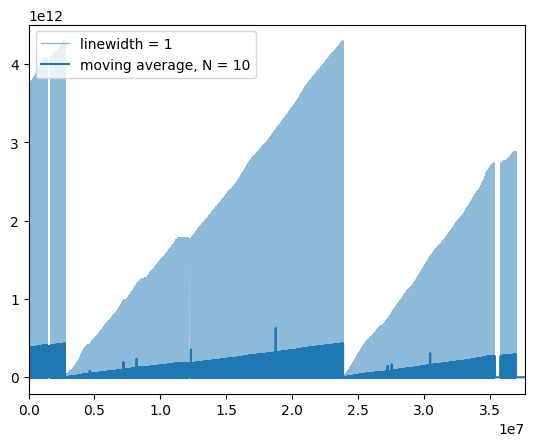

In [27]:
plt.plot(df1['decodedValue'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
plt.plot(moving_avg(df1['decodedValue'], 10), 'C0', label = 'moving average, N = 10')
plt.xlim(0,len(df1['decodedValue']))
plt.legend()
plt.show()

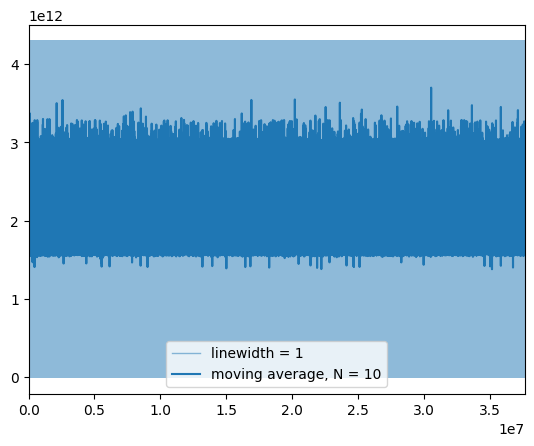

In [26]:
plt.plot(synthetic_df['decodedValue'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
plt.plot(moving_avg(synthetic_df['decodedValue'], 10), 'C0', label = 'moving average, N = 10')
plt.xlim(0,len(synthetic_df['decodedValue']))
plt.legend()

plt.show()

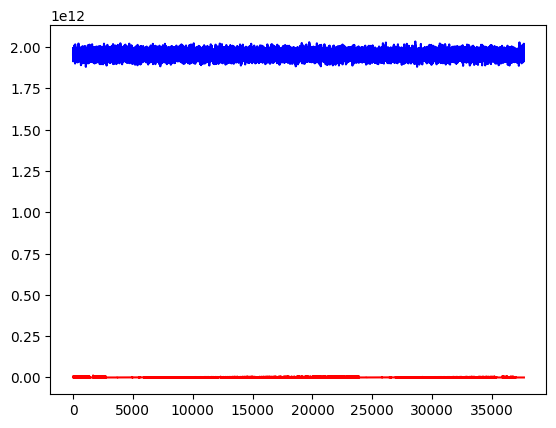

In [28]:

w = 1000
v1 = synthetic_df['decodedValue'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
v2 = df1['decodedValue'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v1)),v2, c='r')
plt.show()